In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../lib/")
from artifact_simulation import *

In [2]:
sample_abp = np.load('../data/ABP_60s_sample.npy')

In [3]:
def Artifact_Simulator(art_type, signal, start, end, sequence_return=False):
    # Check if type_int is a valid index
    if art_type not in [1, 2, 3, 4, 5]:
        raise ValueError("art_type must be one of the following: 1, 2, 3, 4, 5")
    
    # Check if the length of the signal is non-zero
    if len(signal) == 0:
        raise ValueError("Length of signal must be greater than 0")
    
    # Validate the start and end values
    if start < 0 or end < 0:
        raise ValueError("start and end must be non-negative")
    if start >= len(signal) or end >= len(signal):
        raise ValueError("start and end must be less than the length of the signal")
    if start >= end:
        raise ValueError("start must be less than end")
    
    # List of artifact functions
    Art_list = [SatABPmax, SatABPmin, RPP, HFNoise, ImpNoise]
    Art_name_list = ["Saturation to Maximum", "Saturation to Minimum", "Reduced Pulse Pressure", "High Frequency", "Impulse Pressure"]
    Art = Art_list[art_type-1](signal, start, end)
    
    # Print artifact type
    print(f"Selected artifact type {art_type}: {Art_name_list[art_type-1]}")

    # Visualization
    plt.figure(figsize=(15,3))
    plt.plot(signal*180+20, 'b', alpha=0.7, label='High Quality Signal')
    plt.plot(Art*180+20, 'r', alpha=0.7, label='Simulated Artifact')
    plt.legend(loc='upper left')
    plt.show()

    if sequence_return:
        return Art
    else:
        return

Selected artifact type 1: Saturation to Maximum


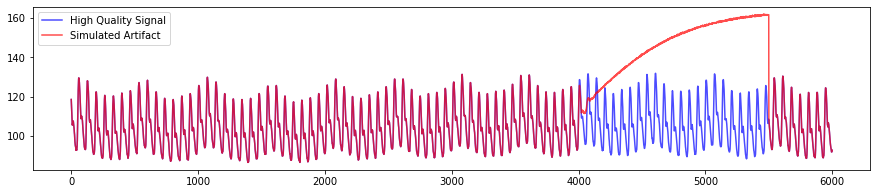

In [4]:
Artifact_Simulator(1,sample_abp[0],4000,5500)

Selected artifact type 2: Saturation to Minimum


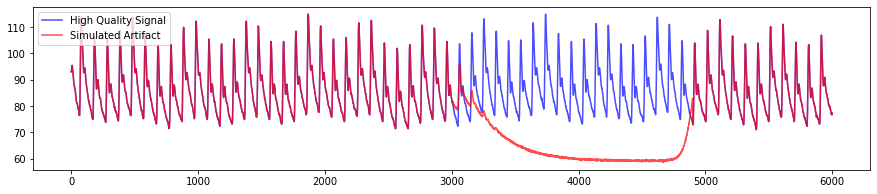

In [5]:
Artifact_Simulator(2,sample_abp[1],3000,4900)

Selected artifact type 3: Reduced Pulse Pressure


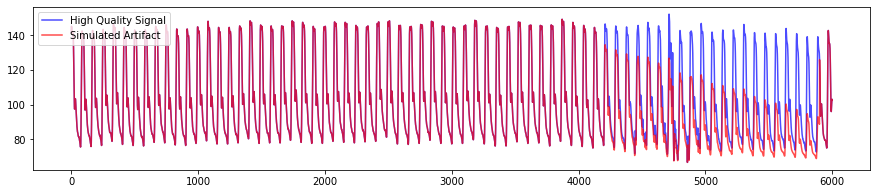

In [6]:
Artifact_Simulator(3,sample_abp[2],4200,5900)

Selected artifact type 4: High Frequency


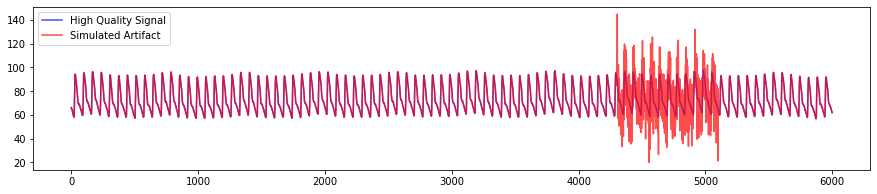

In [10]:
Artifact_Simulator(4,sample_abp[3],4300,5100)

Selected artifact type 5: Impulse Pressure


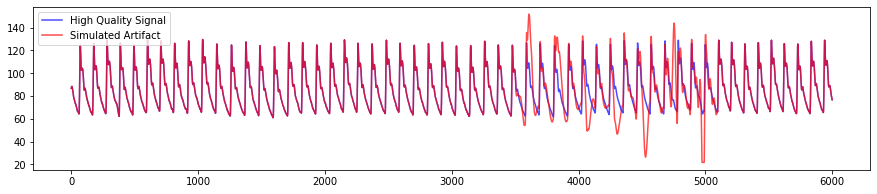

In [11]:
Artifact_Simulator(5,sample_abp[4],3500,5100)